In [25]:
# !python3 -m pip install ipykernel -U --user --force-reinstall
# !pip install matplotlib
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install catboost
# !pip install scikit-learn
# !pip install xgboost

     |████████████████████████████████| 255.9 MB 49 kB/s s eta 0:00:01     |█████████████████               | 135.4 MB 68.4 MB/s eta 0:00:02


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import sklearn

: 

In [ ]:
path = "./data/"
book = pd.read_csv(path+"books.csv")
users = pd.read_csv(path+"users.csv")
train_ratings = pd.read_csv(path+"train_ratings.csv")

: 

In [9]:
data = pd.merge(pd.merge(book, train_ratings, on="isbn"), users, on="user_id")
data

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,Warner Books,http://images.amazon.com/images/P/0446608831.0...,NaN,NaN,NaN,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,en,"['Authors, Canadian (English) 20th century Bio...",Her writings span almost the entire twentieth ...,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,Random House,http://images.amazon.com/images/P/0375507299.0...,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.0...,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0


In [10]:
data["location_city"] = data["location"].apply(lambda x : x.split(',')[0])
data["location_state"] = data["location"].apply(lambda x : x.split(',')[1])
data["location_country"] =  data["location"].apply(lambda x : x.split(',')[2])

In [15]:
data

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,fiction,"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg,8,4,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,8,2,"timmins, ontario, canada",NaN,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,8,6,"timmins, ontario, canada",NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306790,0446608831,Texas Crime Chronicles,Texas Monthly,2000.0,Warner Books,http://images.amazon.com/images/P/0446608831.0...,NaN,NaN,NaN,images/0446608831.01.THUMBZZZ.jpg,278411,8,"stratford, texas, usa",54.0,stratford,texas,usa
306791,1550390961,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,en,"authors, canadian (english) 20th century biogr...",Her writings span almost the entire twentieth ...,images/1550390961.01.THUMBZZZ.jpg,278621,8,"victoria, delaware, canada",74.0,victoria,delaware,canada
306792,0375507299,The Snow Geese: A Story of Home,William Fiennes,2002.0,Random House,http://images.amazon.com/images/P/0375507299.0...,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg,278636,2,"irvington, alabama, usa",NaN,irvington,alabama,usa
306793,0345330293,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.0...,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg,278659,10,"vancouver, washington, usa",33.0,vancouver,washington,usa


In [8]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as spst
import sklearn
from catboost import CatBoostClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

path = "./data/"
book = pd.read_csv(path+"books.csv")
users = pd.read_csv(path+"users.csv")
train_ratings = pd.read_csv(path+"train_ratings.csv")
test_ratings = pd.read_csv(path+"test_ratings.csv")
data = pd.merge(pd.merge(book, train_ratings, on="isbn"), users, on="user_id")
test_data = pd.merge(pd.merge(book, test_ratings, on="isbn"), users, on="user_id")

data["location_city"] = data["location"].apply(lambda x : x.split(',')[0])
data["location_state"] = data["location"].apply(lambda x : x.split(',')[1])
data["location_country"] =  data["location"].apply(lambda x : x.split(',')[2])

test_data["location_city"] = test_data["location"].apply(lambda x : x.split(',')[0])
test_data["location_state"] = test_data["location"].apply(lambda x : x.split(',')[1])
test_data["location_country"] =  test_data["location"].apply(lambda x : x.split(',')[2])

column = 'category'
data.loc[~data[column].isna(), column] = data.loc[~data[column].isna(), column].apply(lambda x : re.sub("[\'\[\]]","",x).lower())
test_data.loc[~test_data[column].isna(), column] = test_data.loc[~test_data[column].isna(), column].apply(lambda x : re.sub("[\'\[\]]","",x).lower())
# data[column].describe().to_frame()

columns = ["book_title", "year_of_publication", "publisher", "language", "category", "user_id", "age", "location_city", "location_state", "location_country"]
fill_nan = data[columns]
fill_nan2 = test_data[columns]
train_test_ = pd.concat([fill_nan, fill_nan2], axis=0)
for c in fill_nan.columns:
    le = LabelEncoder()
    le.fit(train_test_[c])
    fill_nan[c] = le.transform(fill_nan[c])
    fill_nan2[c] = le.transform(fill_nan2[c])
imp = KNNImputer()
fill_nan = imp.fit_transform(fill_nan)
fill_nan2 = imp.transform(fill_nan2)
# imp = IterativeImputer(
#     estimator=[(CatBoostClassifier(verbose=False), slice(1, 10))],
#     transformers=[(OneHotEncoder(sparse=False), slice(1, 10))],
#     initial_strategy="most_frequent",
#     verbose=1
# )
# X_filled = imp.fit_transform(fill_nan)
# print(X_filled)

/tmp/ipykernel_23962/1005392365.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_nan[c] = le.transform(fill_nan[c])
/tmp/ipykernel_23962/1005392365.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fill_nan2[c] = le.transform(fill_nan2[c])


In [9]:
tmp = pd.DataFrame(fill_nan, columns=columns)
new_train = pd.concat([tmp, data['rating']], axis=1)
new_train

,book_title,year_of_publication,publisher,language,category,user_id,age,location_city,location_state,location_country,rating
0,20344.0,89.0,4598.0,4.0,144.0,0.0,91.0,10869.0,1055.0,56.0,4
1,131187.0,90.0,9212.0,4.0,2398.0,0.0,91.0,10869.0,1055.0,56.0,4
2,111089.0,92.0,4937.0,26.0,4259.0,0.0,91.0,10869.0,1055.0,56.0,2
3,53653.0,87.0,6770.0,26.0,4259.0,0.0,91.0,10869.0,1055.0,56.0,2
4,120495.0,86.0,1595.0,26.0,4259.0,0.0,91.0,10869.0,1055.0,56.0,6
...,...,...,...,...,...,...,...,...,...,...,...
306790,96959.0,88.0,10985.0,26.0,4259.0,67957.0,49.0,10483.0,1381.0,322.0,8
306791,42161.0,87.0,9552.0,4.0,689.0,68012.0,69.0,11306.0,397.0,56.0,8
306792,116946.0,90.0,8549.0,26.0,4259.0,68014.0,91.0,5059.0,50.0,322.0,2
306793,124396.0,69.0,983.0,26.0,4259.0,68022.0,28.0,11227.0,1511.0,322.0,10


In [10]:
new_test = pd.DataFrame(fill_nan2, columns=columns)
new_test

,book_title,year_of_publication,publisher,language,category,user_id,age,location_city,location_state,location_country
0,20344.0,89.0,4598.0,4.0,144.0,2719.0,91.0,7297.0,913.0,193.0
1,76544.0,81.0,820.0,26.0,4259.0,2719.0,91.0,7297.0,913.0,193.0
2,12356.0,82.0,8073.0,4.0,2398.0,2719.0,91.0,7297.0,913.0,193.0
3,75957.0,87.0,10204.0,4.0,2842.0,2719.0,91.0,7297.0,913.0,193.0
4,87161.0,90.0,983.0,4.0,2759.0,2719.0,91.0,7297.0,913.0,193.0
...,...,...,...,...,...,...,...,...,...,...
76694,28537.0,82.0,11189.0,26.0,4259.0,67697.0,91.0,7203.0,913.0,111.0
76695,117178.0,72.0,7854.0,26.0,4259.0,67716.0,91.0,11645.0,913.0,206.0
76696,59089.0,78.0,5740.0,8.0,4259.0,67745.0,30.0,4166.0,71.0,105.0
76697,95831.0,82.0,1065.0,4.0,3932.0,67921.0,36.0,7487.0,784.0,322.0


In [11]:
clf = CatBoostClassifier()
clf.fit(new_train.iloc[:,:-1], new_train.iloc[:, -1])
pred = clf.predict(new_test)

Learning rate set to 0.105963
0:	learn: 2.2534856	total: 463ms	remaining: 7m 42s
1:	learn: 2.2165599	total: 647ms	remaining: 5m 23s
2:	learn: 2.1873496	total: 863ms	remaining: 4m 46s
3:	learn: 2.1642902	total: 1.14s	remaining: 4m 42s
4:	learn: 2.1459853	total: 1.53s	remaining: 5m 4s
5:	learn: 2.1295502	total: 1.95s	remaining: 5m 23s
6:	learn: 2.1172500	total: 2.26s	remaining: 5m 21s
7:	learn: 2.1070830	total: 2.7s	remaining: 5m 34s
8:	learn: 2.0989001	total: 3.08s	remaining: 5m 39s
9:	learn: 2.0923651	total: 3.52s	remaining: 5m 48s
10:	learn: 2.0868720	total: 3.94s	remaining: 5m 54s
11:	learn: 2.0814471	total: 4.37s	remaining: 6m
12:	learn: 2.0775799	total: 4.71s	remaining: 5m 57s
13:	learn: 2.0746087	total: 5.2s	remaining: 6m 6s
14:	learn: 2.0714197	total: 5.55s	remaining: 6m 4s
15:	learn: 2.0690490	total: 5.89s	remaining: 6m 2s
16:	learn: 2.0652649	total: 6.31s	remaining: 6m 4s
17:	learn: 2.0634596	total: 6.71s	remaining: 6m 6s
18:	learn: 2.0620772	total: 7.08s	remaining: 6m 5s
19:	l

In [26]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# reg = CatBoostRegressor(iterations=10000, learning_rate=1e-1, random_seed=777, task_type="GPU")
# reg.fit(new_train.iloc[:,:-1], new_train.iloc[:, -1])
# pred = reg.predict(new_test)

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10)
xgb_model.fit(new_train.iloc[:,:-1], new_train.iloc[:, -1])
pred = xgb_model.predict(new_test)

In [27]:
pred

array([6.835937 , 6.7130027, 6.6983294, ..., 7.129917 , 6.551333 ,
       7.155862 ], dtype=float32)

In [28]:
submit = pd.read_csv("./data/sample_submission.csv")
submit['rating']= pred
submit.to_csv("XGBREG.csv",index=False)

In [15]:
submit = pd.read_csv("./data/sample_submission.csv")
submit['rating']= pred
submit.to_csv("catCLF.csv",index=False)

### 단변량분석

#### Data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 306795 non-null  object 
 1   book_title           306795 non-null  object 
 2   book_author          306795 non-null  object 
 3   year_of_publication  306795 non-null  float64
 4   publisher            306795 non-null  object 
 5   img_url              306795 non-null  object 
 6   language             187711 non-null  object 
 7   category             185574 non-null  object 
 8   summary              187711 non-null  object 
 9   img_path             306795 non-null  object 
 10  user_id              306795 non-null  int64  
 11  rating               306795 non-null  int64  
 12  location             306795 non-null  object 
 13  age                  214133 non-null  float64
 14  location_city        306795 non-null  object 
 15  location_state   

language, category, summary, age에 결측치가 존재함


In [7]:
data.describe()

,year_of_publication,user_id,rating,age
count,306795.000000,306795.000000,306795.000000,214133.000000
mean,1995.675255,136128.416099,7.069714,36.662462
std,7.412889,80512.194379,2.433217,12.282089
min,1376.000000,8.000000,1.000000,5.000000
25%,1993.000000,67591.000000,6.000000,28.000000
50%,1997.000000,134076.000000,8.000000,35.000000
75%,2001.000000,206438.000000,9.000000,45.000000
max,2005.000000,278854.000000,10.000000,99.000000


In [8]:
def missing_info(data, col):
    print(data[col].isna().sum())
    print(data[col].value_counts() / data.shape[0]) # NAN 포함된 건수 비율
    print(data[col].value_counts() / data[col].count()) # NAN 미포함 건수 비율

#### isbn

In [9]:
column = 'isbn'

In [10]:
data[column].value_counts()

0316666343    566
0971880107    465
0385504209    390
0312195516    307
0060928336    256
             ... 
0679312544      1
067903515X      1
0676973787      1
0618031685      1
0670528951      1
Name: isbn, Length: 129777, dtype: int64

### year_of_publication

In [11]:
column = 'year_of_publication'

In [12]:
data[column].describe().to_frame()

,year_of_publication
count,306795.000000
mean,1995.675255
std,7.412889
min,1376.000000
25%,1993.000000
50%,1997.000000
75%,2001.000000
max,2005.000000


In [13]:
# 1900년도 이전의 출판된 책은 2권
data.loc[data[column] < 1900]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating,location,age,location_city,location_state,location_country
145441,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,fa,['Fantasy fiction'],"Mahnaz, the only daughter of a traditional ari...",images/9643112136.01.THUMBZZZ.jpg,116599,10,"tehran, tehran, iran",29.0,tehran,tehran,iran
243927,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,NaN,NaN,NaN,images/964442011X.01.THUMBZZZ.jpg,170186,1,"tehran, n/a, iran",27.0,tehran,n/a,iran


In [14]:
data[column].value_counts()

2002.0    30311
2001.0    25818
2003.0    23326
1999.0    23255
2000.0    22669
          ...  
1933.0        1
1900.0        1
1378.0        1
1376.0        1
1904.0        1
Name: year_of_publication, Length: 92, dtype: int64

/tmp/ipykernel_21731/2813838255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=16)


<AxesSubplot: xlabel='year_of_publication', ylabel='Density'>

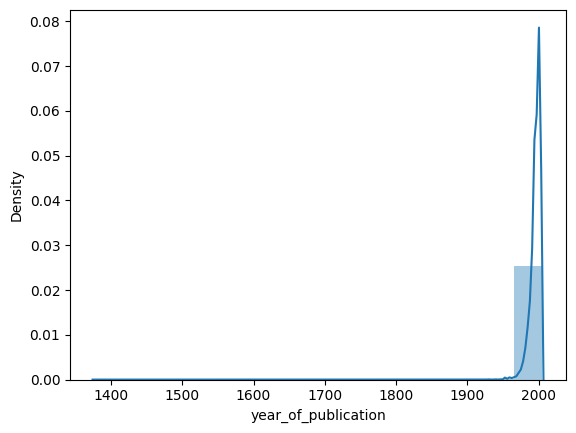

In [15]:
sns.distplot(data[column], bins=16)

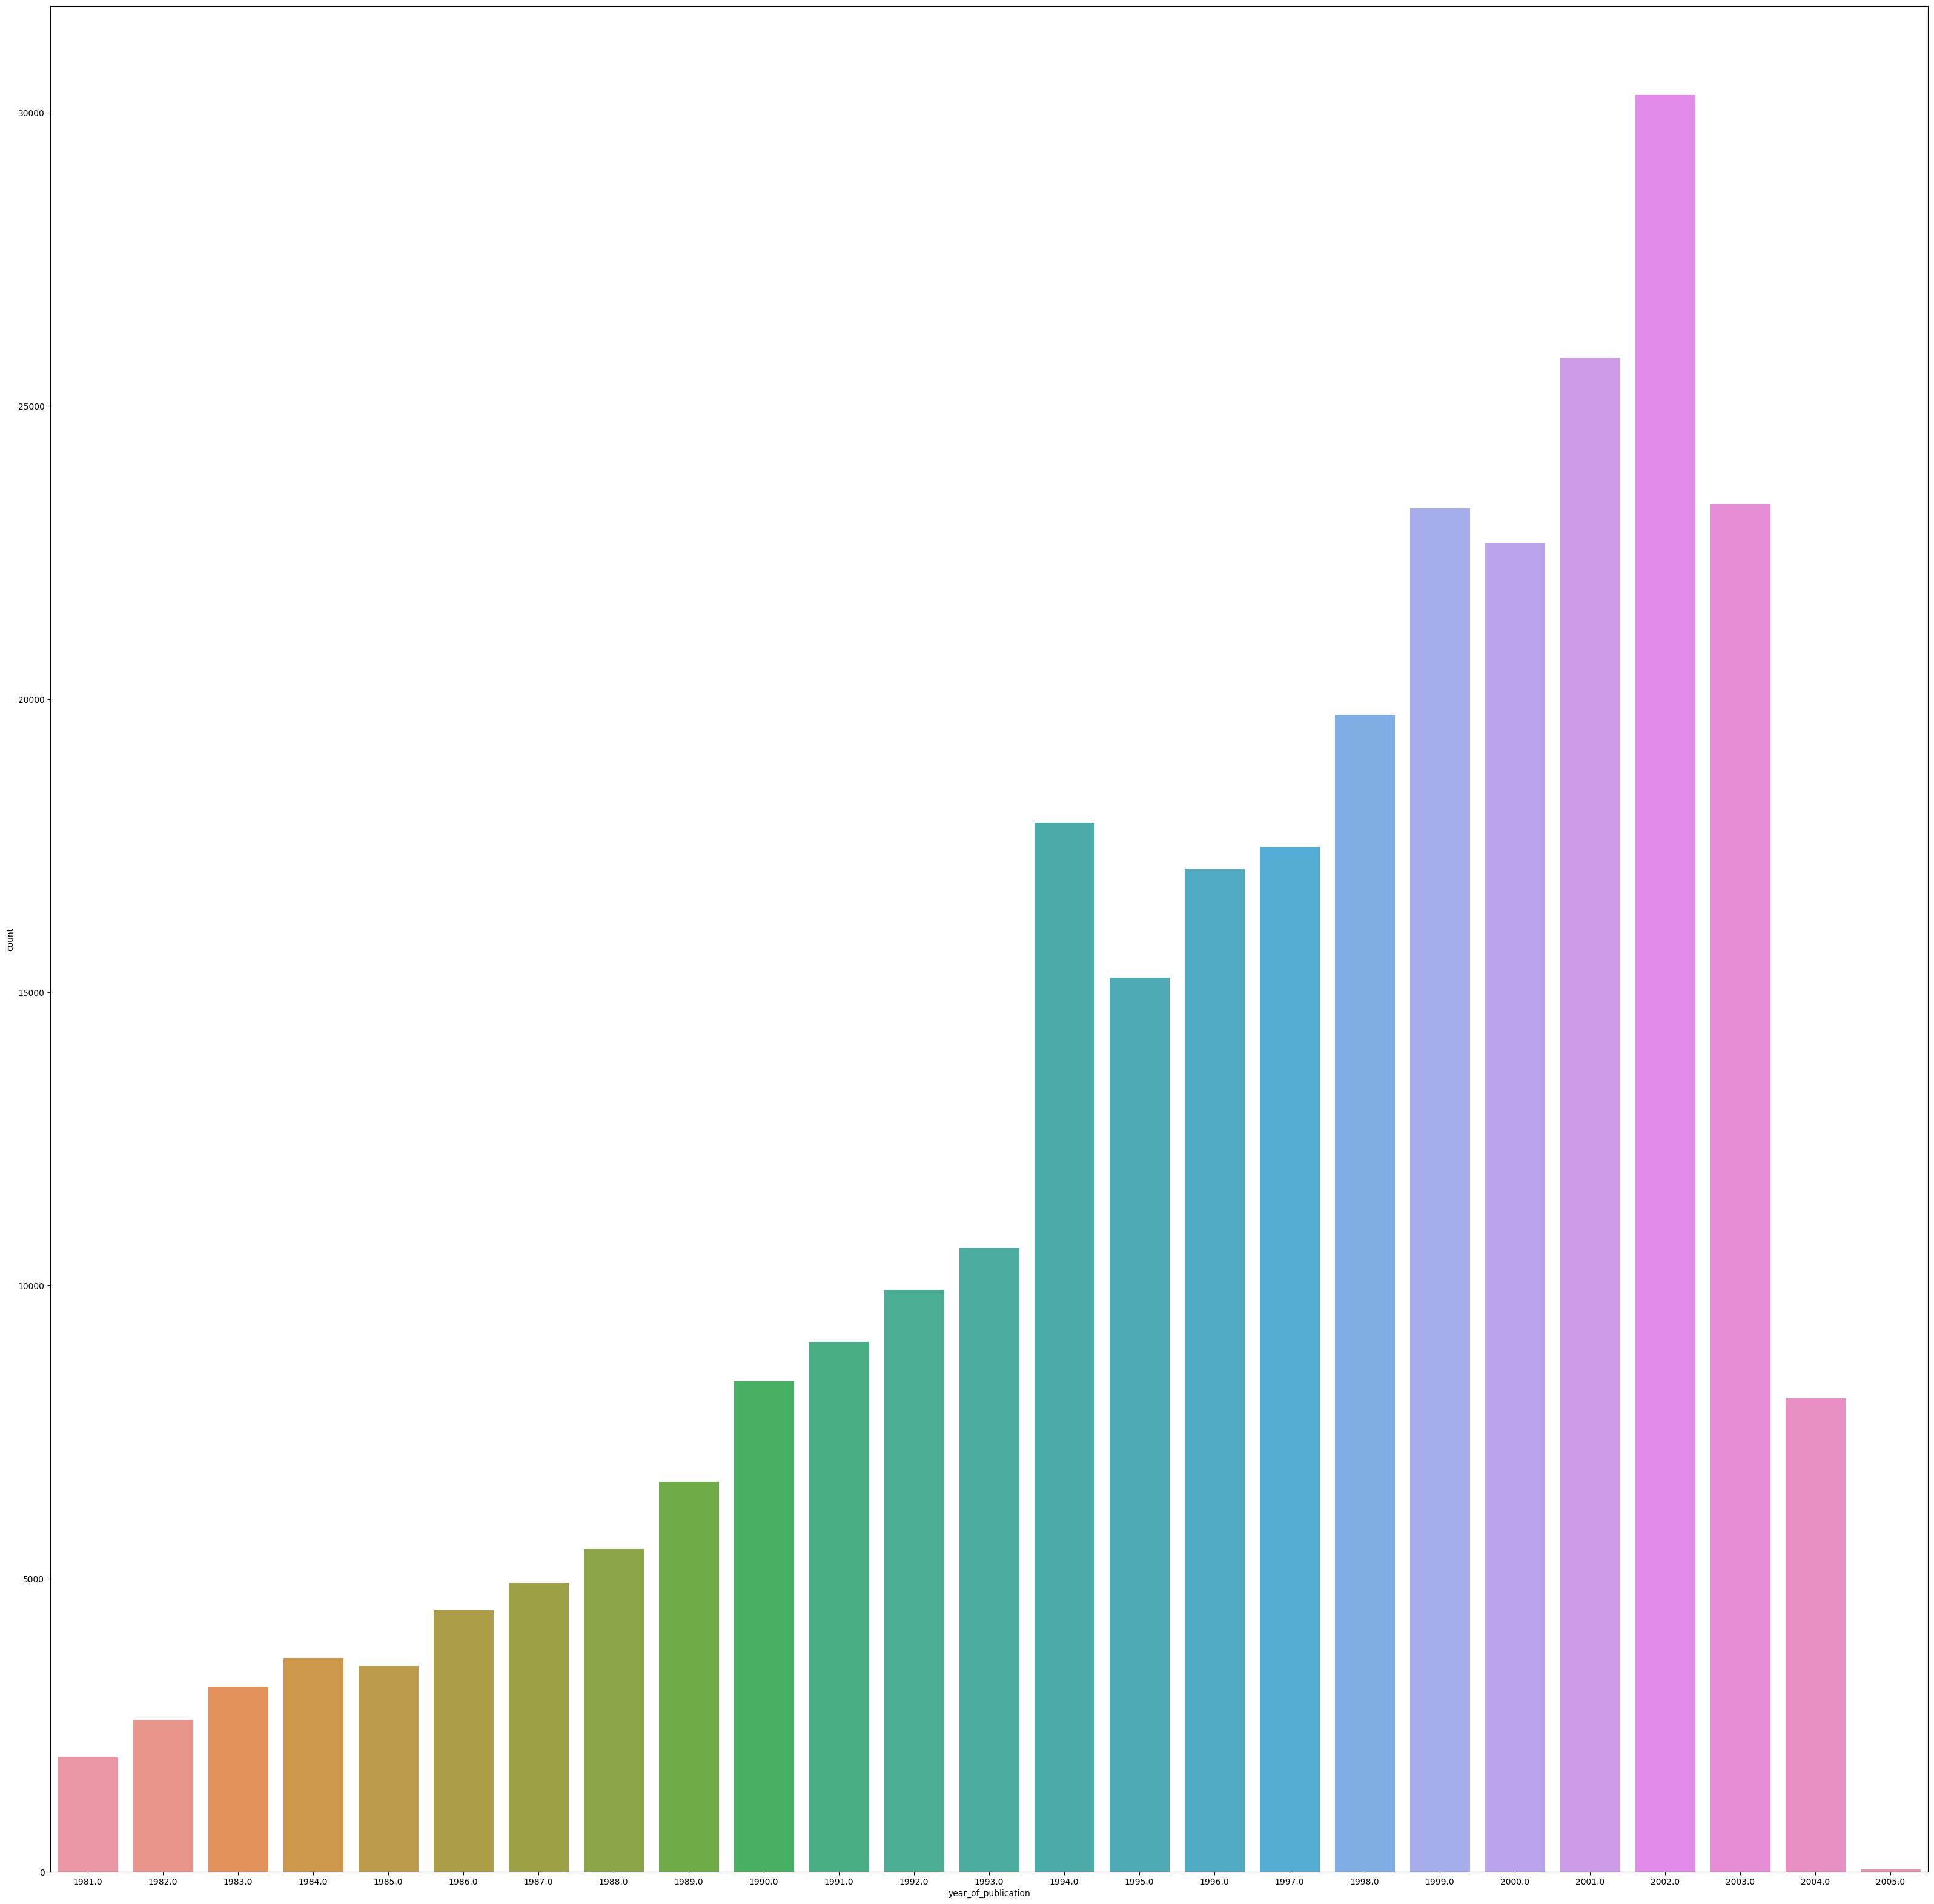

In [16]:
plt.figure(figsize=(40, 40))
sns.countplot(x=column, data=data.loc[data[column] > 1980])
plt.show()

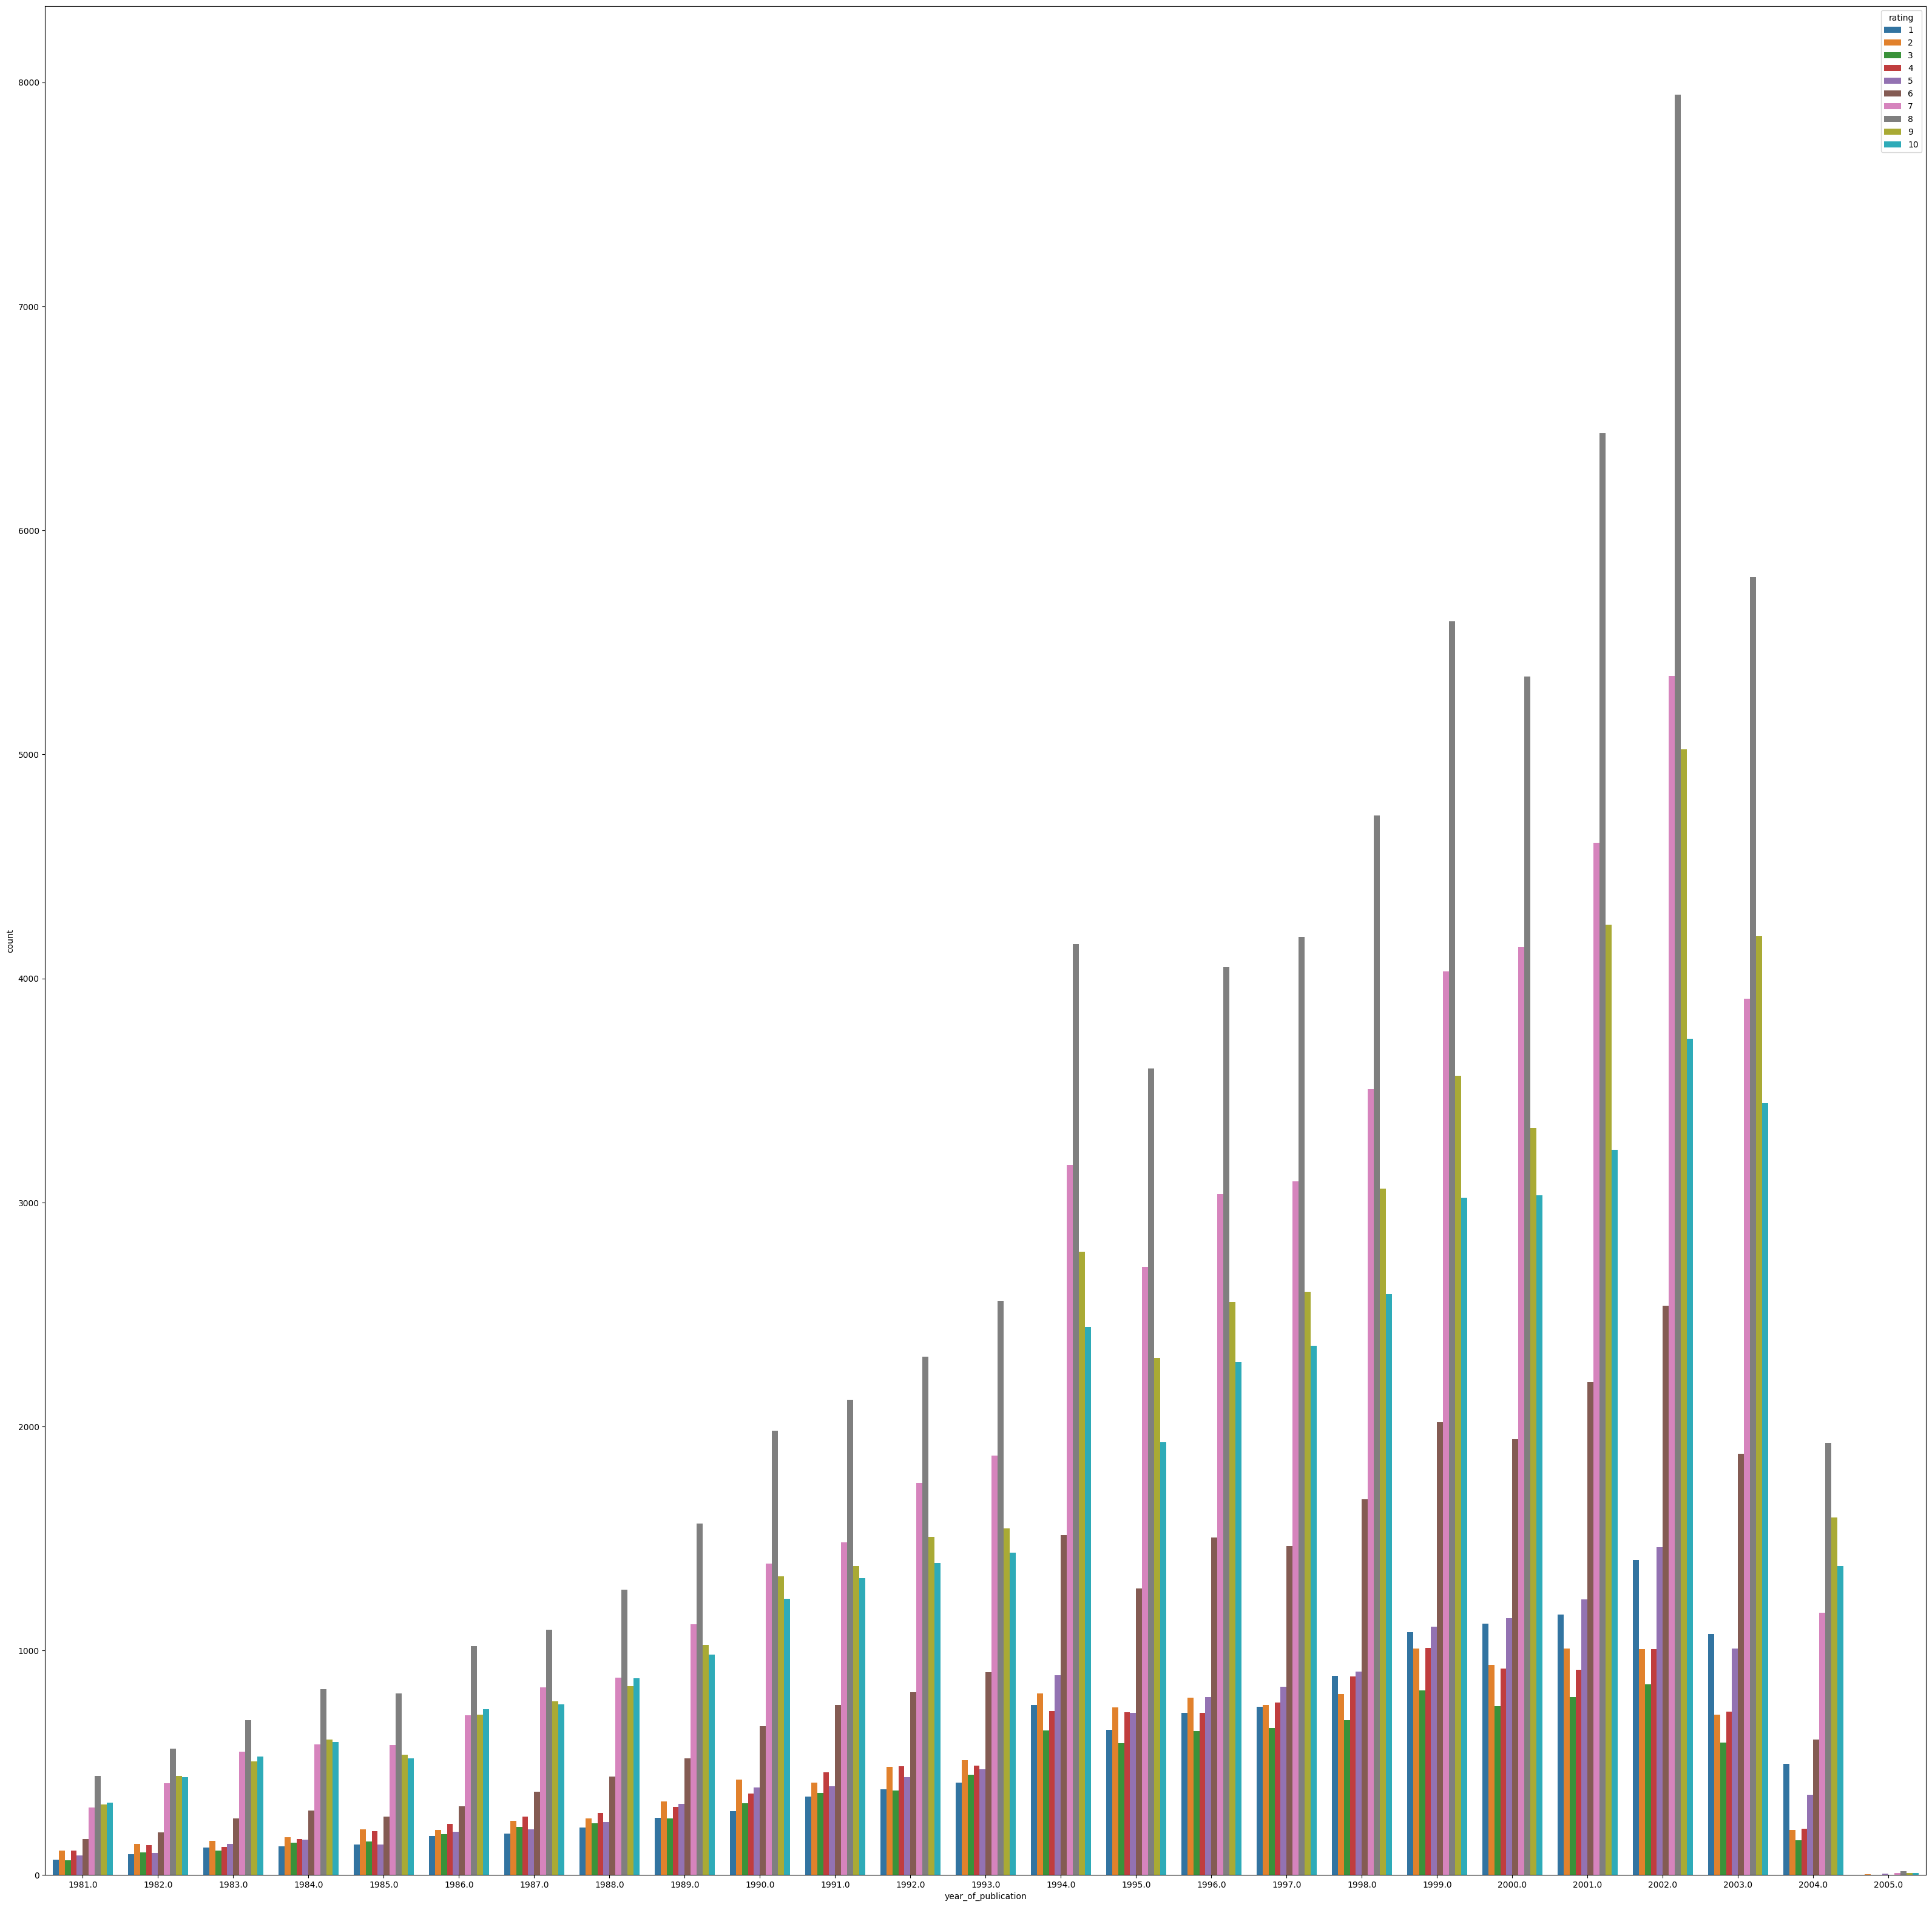

In [17]:
# 8, 7, 9, 10, 6 순서로 rating이 많이 매겨지는 경향이 보임
# 나머지는 rating은 비슷하게 매겨지는 경향이 있음
# 6~10 사이를 맞추는 것에 조금 더 집중을 해도 좋을 것 같음
# 6~10을 맞추는 모델과 1~5를 맞추는 모델을 나눠서 돌려도 좋을 것 같음 
# --> 그러려면 1~5가 갖는 특징과 6~10이 갖는 특징을 찾아서 구분할 수 있는 피쳐를 만들어야함

plt.figure(figsize=(40, 40))
sns.countplot(x=column, data=data.loc[data[column] > 1980], hue="rating")
plt.show()

### publisher

In [6]:
column = 'publisher'

In [7]:
data[column].describe().to_frame()

,publisher
count,306795
unique,10408
top,Ballantine Books
freq,10227


In [8]:
data[column] = data[column].apply(lambda x: x.lower())
data[column].describe().to_frame()

,publisher
count,306795
unique,10275
top,ballantine books
freq,10227


In [9]:
# 겹치는 이름이 너무 많음
# 겹치는 이름을 하나로 통합해 줄 필요가 있음
# 10000개라 수작업으로 해도 좋을 듯
data[column].value_counts()
sorted(data[column].unique())

[' tri-state press',
 "'k' pub",
 '10-18',
 '10/18',
 '10/18 uge',
 '1001 nuits',
 '101 productions',
 '101 productions; [distributed by scribner, new york]',
 '11/9 publishing',
 '1stbooks library',
 '2 13 61',
 '2.13.61 publications',
 '219 press',
 '21st century information',
 '21st century publications',
 '22/7 publishing company',
 '22nd. century, new york',
 '29th street press',
 '2nd avenue publishing, inc.',
 '3',
 '300incredible.com',
 '37547',
 '3h productions, inc.',
 '3rd bed',
 '3rd woman press',
 '5 star publications',
 '[distributed by] fundacã£o oriente',
 '[published for] the crime club [by] collins',
 '\\corvina\\""',
 'a & b book dist inc',
 'a & b distributors',
 'a & c black (publishers) ltd',
 'a & w pub',
 'a & w visual library',
 'a different voice publishing co.',
 'a disney/bantam books',
 'a golden book',
 'a h m publications',
 'a j k publishing',
 'a k pr distribution',
 'a new hope pub',
 'a plume book',
 'a r hari',
 'a scholastic/madison prss book',
 'a 

### img_url

In [10]:
column = 'img_url'

In [11]:
data[column].describe().to_frame()

,img_url
count,306795
unique,129777
top,http://images.amazon.com/images/P/0316666343.0...
freq,566


In [12]:
pd.set_option('display.max_colwidth', -1)
data[['img_url','isbn']]

/tmp/ipykernel_23109/2460350009.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,img_url,isbn
0,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,0002005018
1,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,074322678X
2,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,0887841740
3,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,1552041778
4,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,1567407781
...,...,...
306790,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg,0446608831
306791,http://images.amazon.com/images/P/1550390961.01.THUMBZZZ.jpg,1550390961
306792,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg,0375507299
306793,http://images.amazon.com/images/P/0345330293.01.THUMBZZZ.jpg,0345330293


In [13]:
## img_url에서 P는 의미없는 것
## 'P'다음 오는 것은 해당 책의 isbn번호이며 isbn뒤에 오는 '01'도 의미 없음
## 이미지 학습시킬 경우에만 사용.
data[column].apply(lambda x: x.split('/')[4]).unique(), data[column].apply(lambda x: x.split('/')[5].split('.')[1]).unique()

(array(['P'], dtype=object), array(['01'], dtype=object))

### language

In [14]:
column = 'language'

In [15]:
data[column].describe().to_frame()

,language
count,187711
unique,24
top,en
freq,182282


In [16]:
# language 결측값 119084개
# language 결측시 category, summary도 무조건 결측
# img_url을 통해 isbn 값을 얻을 수 있고 isbn값을 통해 language를 채울 수 있음

# data.loc[data[column].isna()]
# data.loc[data[column].isna() & data['category'].isna(), 'img_url'].isna().sum()
data.loc[data[column].isna() & data['category'].isna(), [column,'category','img_url']]

,language,category,img_url
2,NaN,NaN,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg
3,NaN,NaN,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg
4,NaN,NaN,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg
8,NaN,NaN,http://images.amazon.com/images/P/0316601950.01.THUMBZZZ.jpg
9,NaN,NaN,http://images.amazon.com/images/P/0316569321.01.THUMBZZZ.jpg
...,...,...,...
306782,NaN,NaN,http://images.amazon.com/images/P/1558747281.01.THUMBZZZ.jpg
306789,NaN,NaN,http://images.amazon.com/images/P/0060530103.01.THUMBZZZ.jpg
306790,NaN,NaN,http://images.amazon.com/images/P/0446608831.01.THUMBZZZ.jpg
306792,NaN,NaN,http://images.amazon.com/images/P/0375507299.01.THUMBZZZ.jpg


In [17]:
tmp = data.loc[data[column].isna() & data['category'].isna(), [column,'category','img_url']]
len(tmp['img_url'].unique())

57627

In [18]:
# 24개 언어 + nan 존재
data[column].unique(), len(data[column].unique())

(array(['en', nan, 'es', 'ru', 'fr', 'de', 'it', 'nl', 'da', 'ca', 'pt',
        'la', 'vi', 'no', 'eo', 'ko', 'zh-CN', 'ga', 'fa', 'ja', 'el',
        'ms', 'ro', 'zh-TW', 'gl'], dtype=object),
 25)

In [19]:
## 대부분의 경우가 영어
data[column].value_counts().to_frame()

,language
en,182282
de,2226
es,1486
fr,1175
it,296
nl,81
pt,56
da,43
ca,23
ru,10


In [20]:
startswith_B = sorted(data['isbn'].tolist())[-51:]
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')[['year_of_publication', 'isbn']]
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')['year_of_publication'].max()
data.loc[data['isbn'].isin(startswith_B)].sort_values('year_of_publication')['year_of_publication'].value_counts().to_frame()
## 전자책이냐 아니냐 ?!
## isbn이 적혀있지만 전자책인지 아닌지는 모르나 ?

,year_of_publication
1994.0,20
2001.0,11
2002.0,9
2000.0,4
1999.0,3
2003.0,2
1996.0,1
1997.0,1


In [21]:
# 언어 다 확인하기
sorted(data.loc[data[column] == 'en', 'isbn'].tolist())

['0000913154',
 '0001055607',
 '0001061127',
 '0001714600',
 '0001856367',
 '0001981625',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005018',
 '0002005395',
 '0002006588',
 '0002006588',
 '0002118580',
 '0002163578',
 '0002179695',
 '0002187272',
 '0002192152',
 '0002197154',
 '0002198274',
 '0002199009',
 '0002200309',
 '0002210967',
 '0002211890',
 '0002211890',
 '0002222752',
 '0002224216',
 '000222674X',
 '0002233509',
 '0002237857',
 '0002239183',
 '0002239183',
 '0002239183',
 '0002240009',
 '0002240114',
 '0002240114',
 '0002240114',
 '0002241358',
 '0002243016',
 '0002243792',
 '0002245663',
 '000225056X',
 '0002250810',
 '0002251000',
 '0002251485',
 '0002251485',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251760',
 '0002251892',
 '0002252066',
 '0002252066',
 '0002253178',
 '0002253305',
 '0002253305',
 '0002253402',
 '0002255553',
 '000225669X',
 '0002256967',
 '0002258560',
 '00022585

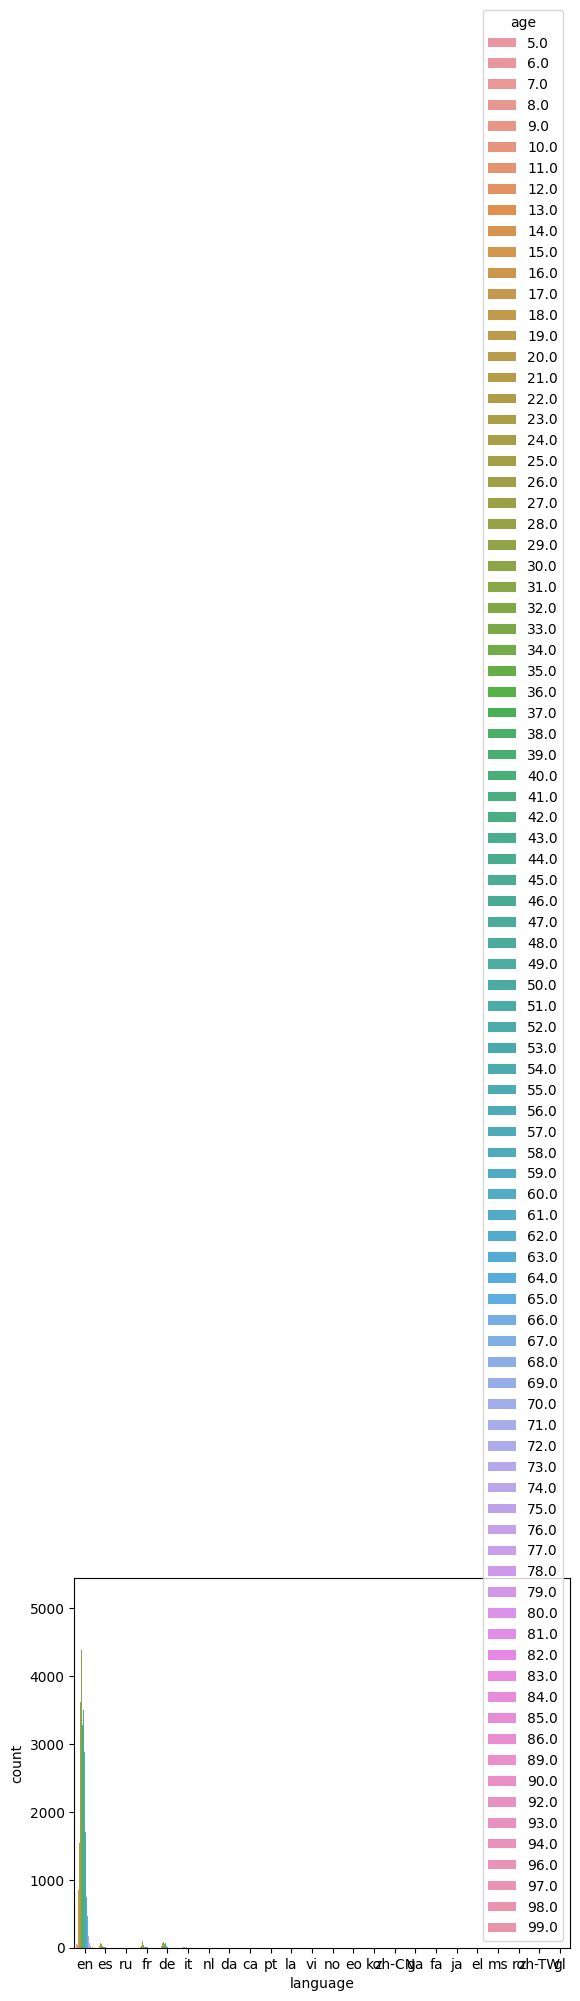

In [22]:
sns.countplot(x=column, data=data, hue='age')
plt.show()

In [23]:
pd.crosstab(data[column], data['rating'], normalize='index') * 100

rating,1,2,3,4,5,6,7,8,9,10
language,,,,,,,,,,
ca,8.695652,0.000000,0.000000,4.347826,21.739130,13.043478,30.434783,13.043478,4.347826,4.347826
da,2.325581,0.000000,0.000000,4.651163,0.000000,18.604651,9.302326,32.558140,16.279070,16.279070
de,9.838275,3.818509,3.054807,3.863432,5.345912,8.849955,16.711590,21.293801,15.229111,11.994609
el,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
en,4.251105,4.208315,3.378831,4.111761,4.542412,8.193349,17.092198,24.017731,16.047662,14.156636
eo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
es,3.835801,3.835801,2.826380,4.172275,5.989233,12.113055,19.650067,22.880215,15.074024,9.623149
fa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
fr,5.531915,2.297872,1.702128,2.297872,5.276596,10.127660,19.659574,26.212766,15.829787,11.063830


### category

In [12]:
column = 'category'

In [13]:
data[column].describe().to_frame()

,category
count,185574
unique,3872
top,['Fiction']
freq,108569


In [14]:
## unique값이 3844개 존재, 하지만 publisher와 마찬가지로 부분 중복이 있음
## 카테고리를 더 크게 묶어주는 것도 가능
## 3844개라 publisher보다 훨씬 수월
## 수작업 가능, 예상 소요시간 : 0.5~1시간
import re
data.loc[~data[column].isna(), column] = data.loc[~data[column].isna(), column].apply(lambda x : re.sub("[\'\[\]]","",x).lower())
data[column].describe().to_frame()

,category
count,185574
unique,3844
top,fiction
freq,108998


### summary

In [27]:
column = 'summary'

In [28]:
data[column].describe().to_frame()

,summary
count,187711
unique,70061
top,"Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point."
freq,465


In [29]:
summary_len = data.loc[~data[column].isna(),column].apply(lambda x: len(x))
summary_vc = summary_len.value_counts()
summary_vc

244    4163
243    3523
241    3393
242    3327
240    3277
       ... 
4      1   
5      1   
294    1   
329    1   
291    1   
Name: summary, Length: 305, dtype: int64

<BarContainer object of 305 artists>

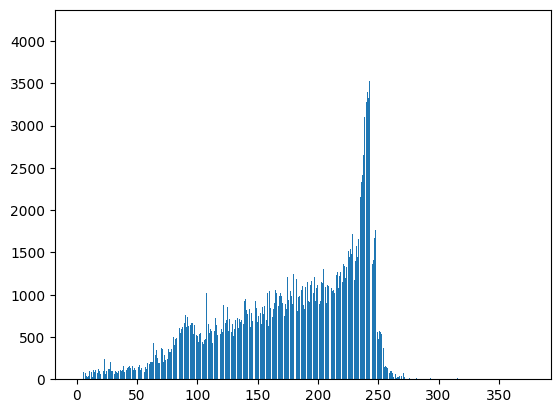

In [30]:
plt.bar(summary_vc.index, summary_vc.values)

### age

In [43]:
column = 'age'

In [44]:
data[column].describe().to_frame()

,age
count,214133.000000
mean,36.662462
std,12.282089
min,5.000000
25%,28.000000
50%,35.000000
75%,45.000000
max,99.000000


In [45]:
tmp = data.loc[~data[column].isna(), column].apply(lambda x: int(x)).to_frame()
tmp

,age
7,30
8,30
9,30
10,30
11,30
...,...
306789,54
306790,54
306791,74
306793,33


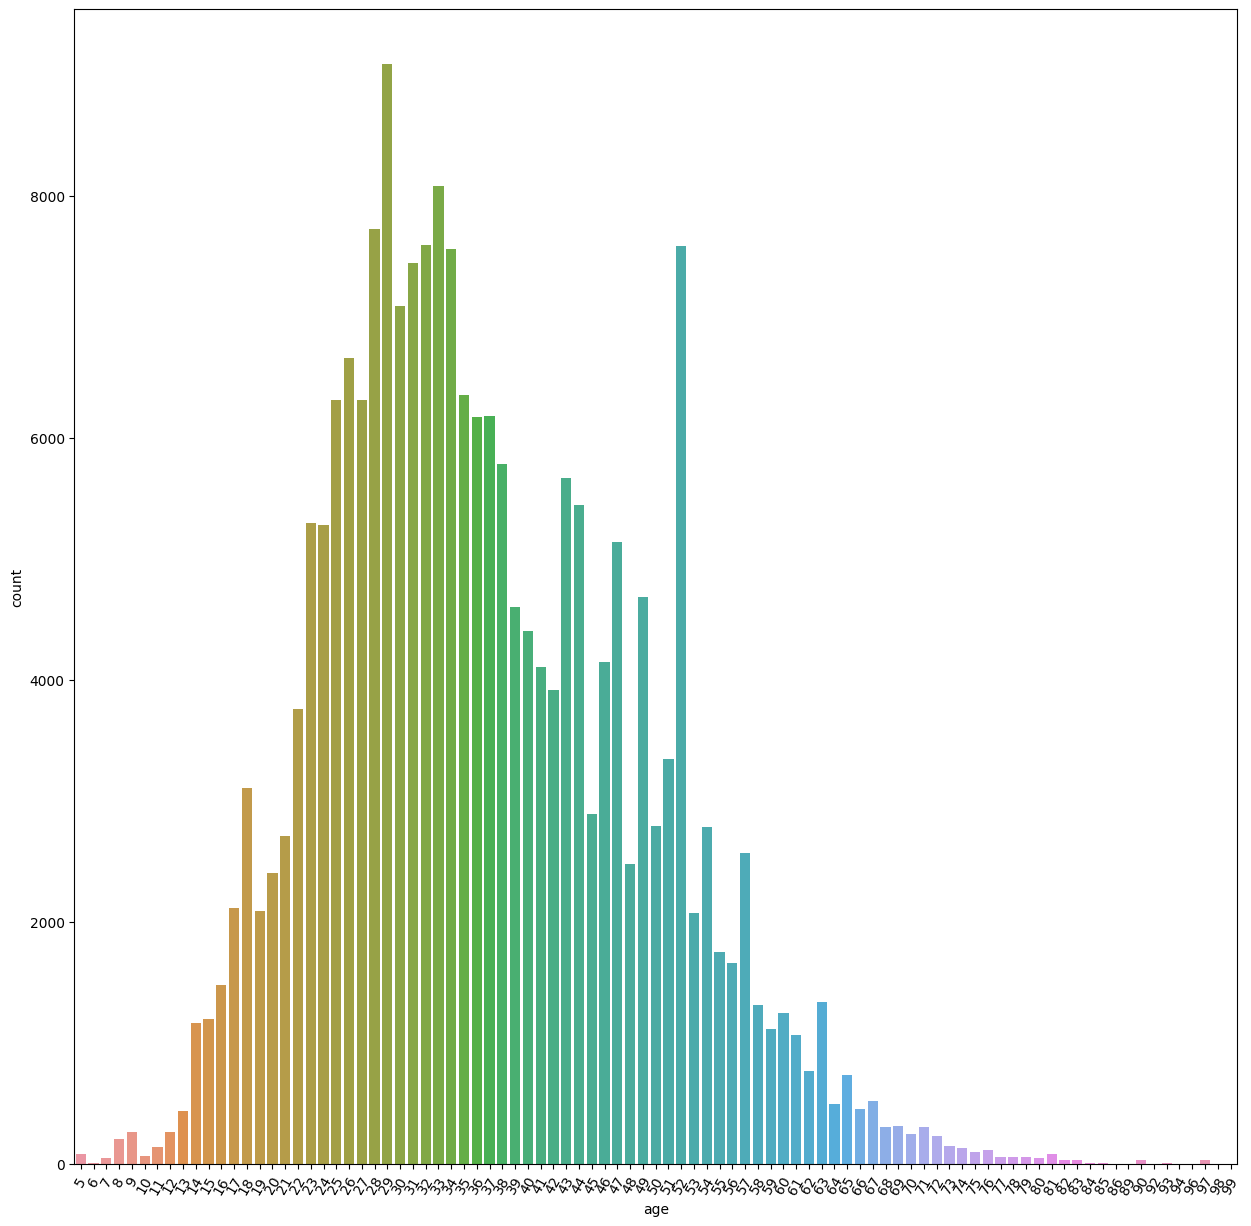

In [46]:
# 나름 정규분포스러운 모습을 나타냄
# 하지만 52세에서 갑자기 값이 튐 -> 왜인지는 알지 못할 것 같다..
plt.figure(figsize=(15, 15))
sns.countplot(x=column, data=tmp)
plt.xticks(rotation=60)
plt.show()

### location_city

In [47]:
column = 'location_city'

In [48]:
data[column].describe().to_frame()

,location_city
count,306795
unique,11374
top,n/a
freq,6749


In [49]:
data.loc[~data[column].isna(), column].to_frame()

,location_city
0,timmins
1,timmins
2,timmins
3,timmins
4,timmins
...,...
306790,stratford
306791,victoria
306792,irvington
306793,vancouver


### location_state

### location_country

### 이변량분석

In [ ]:
data.drop(["img_url", "img_path", "summary", "location", "book_title"], axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical = ["isbn", "book_author", "year_of_publication", "publisher", "language", "category", "user_id", "age", "location_city", "location_state", "location_country"]
for c in categorical:
    le = LabelEncoder()
    data[c] = le.fit_transform(data[c])

In [20]:
data

,isbn,book_author,year_of_publication,publisher,language,category,user_id,rating,age,location_city,location_state,location_country
0,31,43657,87,4143,4,134,0,4,91,10073,973,45
1,76197,2400,88,8285,4,2197,0,4,91,10073,973,45
2,96808,47720,90,4443,24,3872,0,2,91,10073,973,45
3,104143,42530,85,6082,24,3872,0,2,91,10073,973,45
4,107921,32348,84,1430,24,3872,0,6,91,10073,973,45
...,...,...,...,...,...,...,...,...,...,...,...,...
306790,45277,50782,86,9886,24,3872,59704,8,49,9712,1272,296
306791,103387,1968,85,8594,4,631,59754,8,69,10483,370,45
306792,28931,53836,88,7678,24,3872,59756,2,91,4664,48,296
306793,21196,38815,67,887,24,3872,59763,10,28,10410,1397,296


In [29]:
table = pd.crosstab(data["rating"], data['location_city'])
result = spst.chi2_contingency(table)
result

(185543.44906750816,
 0.0,
 102357,
 array([[ 4.18896331,  0.04318519,  0.04318519, ...,  0.04318519,
          0.04318519,  0.04318519],
        [ 4.08778826,  0.04214215,  0.04214215, ...,  0.04214215,
          0.04214215,  0.04214215],
        [ 3.32612983,  0.03429   ,  0.03429   , ...,  0.03429   ,
          0.03429   ,  0.03429   ],
        ...,
        [23.2680487 ,  0.23987679,  0.23987679, ...,  0.23987679,
          0.23987679,  0.23987679],
        [15.38904154,  0.15864991,  0.15864991, ...,  0.15864991,
          0.15864991,  0.15864991],
        [13.5239427 ,  0.13942209,  0.13942209, ...,  0.13942209,
          0.13942209,  0.13942209]]))

In [34]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ["location_city", "rating"])
plt.show()